## Lecture 10: Multiple testing

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import t
from scipy.stats import ttest_1samp

torch.manual_seed(42)

In [60]:
sample = np.random.binomial(10,0.5)

In [61]:
sample

3

In [62]:
nsim = 10000
nheads = np.zeros((nsim))

for i in range(nsim):
    sample = np.random.binomial(10,0.5)
    nheads[i] = sample

(array([   8.,   69.,  466., 1193., 2022., 2436., 2080., 1197.,  433.,
          96.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

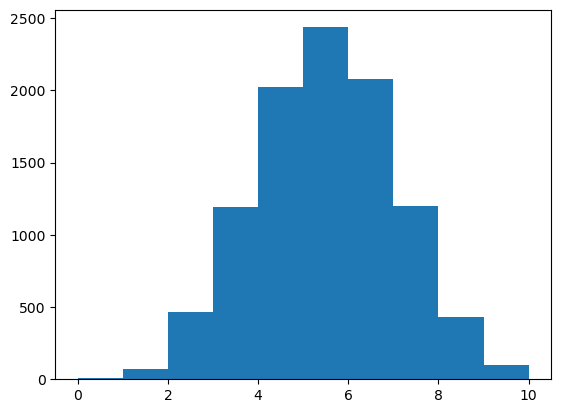

In [63]:
plt.hist(nheads)

In [58]:
sum(nheads == 0)

10

### One-sample t-tests for mean
- Run tests for $p$ hypotheses
- Bonferroni 
- Holms
- FDR

In [64]:
n = 100        # number of samples
p = 500         # number of features

X = np.random.normal(size = (n, p))
#h0 is true


In [65]:
X[:, 0]

array([-1.23144817, -1.6221481 ,  0.78530339,  0.19165089,  0.84894177,
        1.06585683, -0.28432315, -0.29614501, -2.4748051 ,  0.47858428,
       -0.24213327,  0.52410957,  0.23189972, -0.94610517, -1.29467143,
        0.13072292, -0.2909665 , -0.39655049, -0.39069435,  1.73524628,
       -0.12923568,  0.13841862,  0.49422539,  0.46360528,  0.03464935,
        1.85822524, -0.19238505,  0.44577581, -0.05795199, -1.51849376,
        0.30713414, -0.38423689, -0.18367048, -1.13872914,  0.42513157,
        2.03316686,  0.63474446, -0.14888316,  1.21969421,  0.30649158,
       -1.09807878, -0.33338102, -0.27322733,  0.13588905,  0.94608741,
       -0.28643423, -0.66412568, -0.1883097 , -1.13789014, -0.6014846 ,
       -0.53071217, -0.9349938 ,  0.29486146,  1.72115537, -1.73645224,
       -1.71836627, -1.33991474,  2.04787357,  0.61984414, -0.32908192,
       -0.63547235, -0.61090382, -1.4197087 , -0.90519644, -0.71474274,
       -0.24549478,  0.95192999, -0.59069714, -0.62842783, -1.42

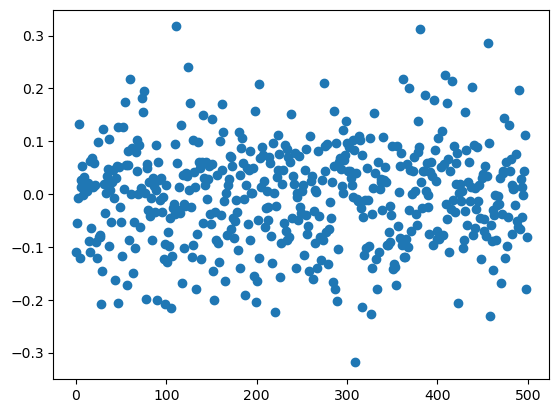

In [66]:
plt.scatter(range(p), X.mean(axis=0))

In [67]:
def ttest_1(x, h0_mean=0):

    df = n-1

    mean = x.mean() # sample mean x_bar
    d = mean - h0_mean # x_bar - mu   (mu=0 under H_0)
    v = np.var(x) # sample variance
    denom = np.sqrt(v / n) # variance of sample mean
    tstat = np.abs(d / denom)
    # xmean - h0_mean / (sqrt(var/n))

    # our test-stat is a t distributed random variable with n-1 degrees of freedom

    pval = t.cdf(-tstat, df = df) + (1 - t.cdf(tstat, df = df)) 

    # pval - probability in the lower and upper tails of our t distribution

    return pval

In [68]:
pvals = np.zeros((p))
for j in range(p):
    pvals[j] = ttest_1samp(X[:, j], 0).pvalue

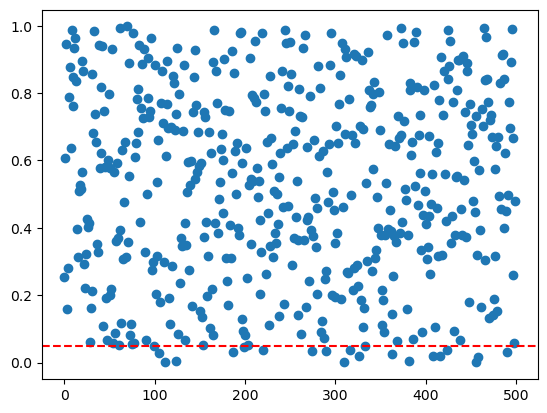

In [69]:
plt.scatter(range(p), pvals)
plt.axhline(y=0.05, color='r', linestyle='--')

In [70]:
# no multiple testing correction
# p = 500 (testing 500 hypotheses)
# we expect to reject 500 * 0.05 = 25
alpha  = 0.05
nmp = np.where(pvals < alpha)[0]
print("No multiple testing correction: reject ", nmp.shape[0])

# bonferroni
bf = np.where(pvals < alpha/p)[0]
print("Bonferroni: reject ", bf.shape[0])

# holms
ord_pvals = np.argsort(pvals)
holms = []
for j, s in enumerate(ord_pvals):
    #j = 0, s is index of smallest p-val
    denom = p - j
    if pvals[s] <= (alpha/denom):
        holms.append(s)
    else:
        break
print("Holms: reject ", len(holms))

# FDR, BH procedure # this is different from holms and bonferroni in that 
# we control FDR, not FWER
q = 0.05
bh = []
for j, s in enumerate(ord_pvals):
    val = q * (j + 1) /p # zero indexing
    if pvals[s] <= val:
        bh.append(s)
    else:
        break

print("Benjamini-Hochberg: reject ", len(bh))

No multiple testing correction: reject  21
Bonferroni: reject  0
Holms: reject  0
Benjamini-Hochberg: reject  0


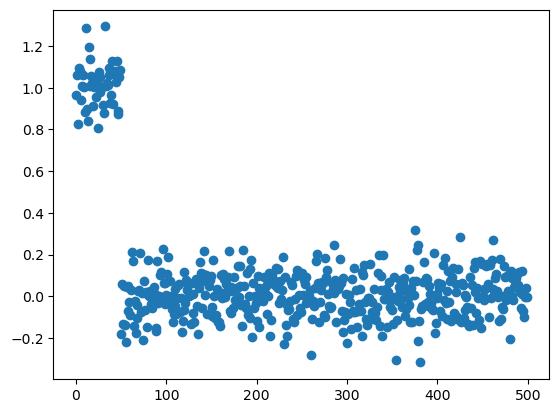

In [71]:
true_mean = np.array([1.0] * int(p/10) + [0] * int(p * 9/10))

X = np.random.normal(size = (n, p))
X = X + true_mean

plt.scatter(range(p), X.mean(axis=0))

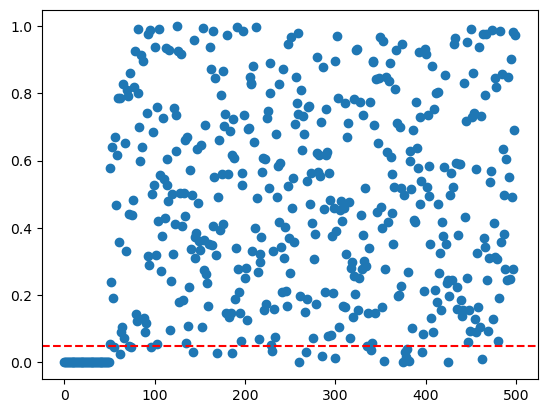

In [72]:
pvals = np.zeros((p))
for j in range(p):
    pvals[j] = ttest_1samp(X[:, j], 0).pvalue
plt.scatter(range(p), pvals)
plt.axhline(y=0.05, color='r', linestyle='--')

In [73]:
print('Number of hypotheses we should reject: ', int(p/10))

# no multiple testing correction
alpha  = 0.05
nmp = np.where(pvals < alpha)[0]
print("No multiple testing correction: reject ", nmp.shape[0])

# bonferroni
bon = np.where(pvals < alpha/p)[0]
print("Bonferroni: reject ", bon.shape[0])

# holms
ord_pvals = np.argsort(pvals)
holms = []
for j, s in enumerate(ord_pvals):
    denom = p - j
    if pvals[s] <= (alpha/denom):
        holms.append(s)
    else:
        break
print("Holms: reject ", len(holms))

# FDR, BH procedure
q = 0.05
bh = []
for j, s in enumerate(ord_pvals):
    val = q * (j + 1) /p # zero indexing
    if pvals[s] <= val:
        bh.append(s)
    else:
        break

print("Benjamini-Hochberg: reject ", len(bh))


Number of hypotheses we should reject:  50
No multiple testing correction: reject  74
Bonferroni: reject  50
Holms: reject  50
Benjamini-Hochberg: reject  55
